## PyTorch Workflow 


In [3]:
import torch


In [4]:
what_were_covering = {1:"data(prepare and load)",
                      2: "build model",
                      3:"fitting the modelto data (training)",
                      4:"making predictions and evaluting a model (inference)",
                      5:"saving and loading a model",
                      6:"putting it all together"}    

what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the modelto data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [5]:
# nn contains all of the pytorch's building blocks for neural netwoks
from torch import nn 
import matplotlib.pyplot as plt

## 1. Data (preparing and loading)

Data can be alomst anything... in machine learning.

* Excel speadsheet
* Image of any kind
* Videos (Youtube has lots of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this , let's create some *known* data using the linear regression formula.
<dr>
We'll use a linear regression formula to make a stright line with known **parameters** .

In [6]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
x= torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * x + bias

x[:10],y[:10] 

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
len(x),len(y)

(50, 50)

## Spliting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and testing set with our data.

In [8]:
# Create a train/test split
train_split = int(0.8*len(x))
X_train, Y_train = x[:train_split] , y[:train_split]
X_test , Y_test = x[train_split:],y[train_split:]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

how might we better visualize our data?

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels= Y_test,
                     predictions=None):
    
    """
    plots training data , test data and compares predictions.
    """
    
    plt.figure(figsize=(10,7))
    
    #Plot training data in blue
    
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    
    #Plot test data in green
    
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
    
    #Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

    # show the legend
    plt.legend(prop={"size": 14})        
        

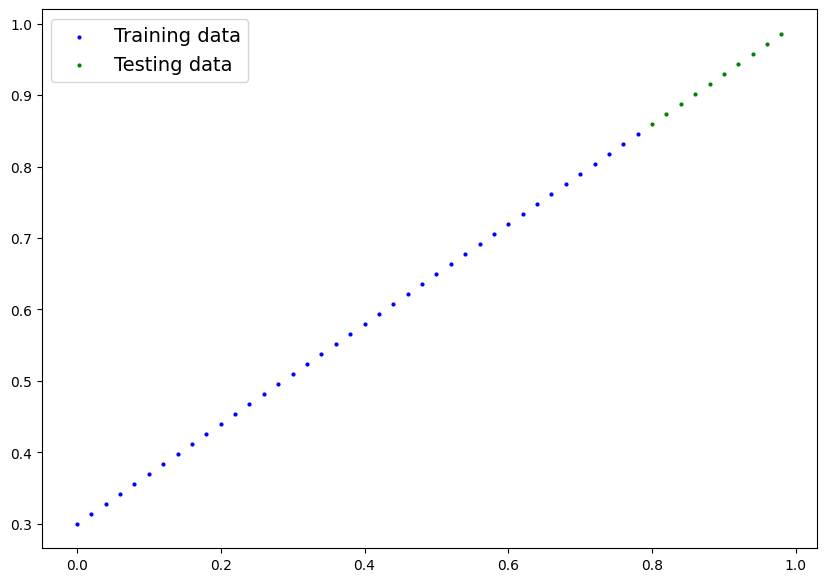

In [10]:
plot_predictions();

## 2. Building model
 

In [11]:
# Create linear regression model class
from torch import nn
# print(x[:10])
class LinearRegressionModel(nn.Module):#<- alomot everyting in pytorch inherhits from nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=float))
        
        # Forward method to define the computation in the model
    def forward(self,x: torch.Tensor) -> torch.Tensor: #<- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula
            

### PyTorch model building essentials

* torch.nn - contain all of the building for computatuinal graphs (a neural network can be consider a computation graph)

* torch.nn.parameter - what parameters should our model try and learn , often a pytorch layer from torch.nn will set these for us

* torch.nn.module - the base class for all nn modeuls, if u subclass it , you should overwrite forward() 

* torch.optim - this where the optimezer in pytorch live , they will help with gradient descent.

* def forward() - all nn.modeule subclasses require u to overwrite forward(),this method defines what happens in the forward computation

## Checking the contents of our pytorch models

 we can check our model parameters or what's inside our model using  **.parameters()**

In [12]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [13]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### Making prediction using 'torch.inference_mode()'

To check our model's predicitve power, let's see how well it predict 'y_test' based on 'x_test'.
<dr>
When we pass data through our model, it's going to run it through the forward() method.



In [14]:
# Make predictions with model

with torch.inference_mode():
    y_preds=model_0(X_test)

# # You con also do something similar with torch.no_grad(),however,torch.inference_mode() is prefered
# with torch.no_grad():
#     y_preds = model_0(X_test)    


y_preds    

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

In [15]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

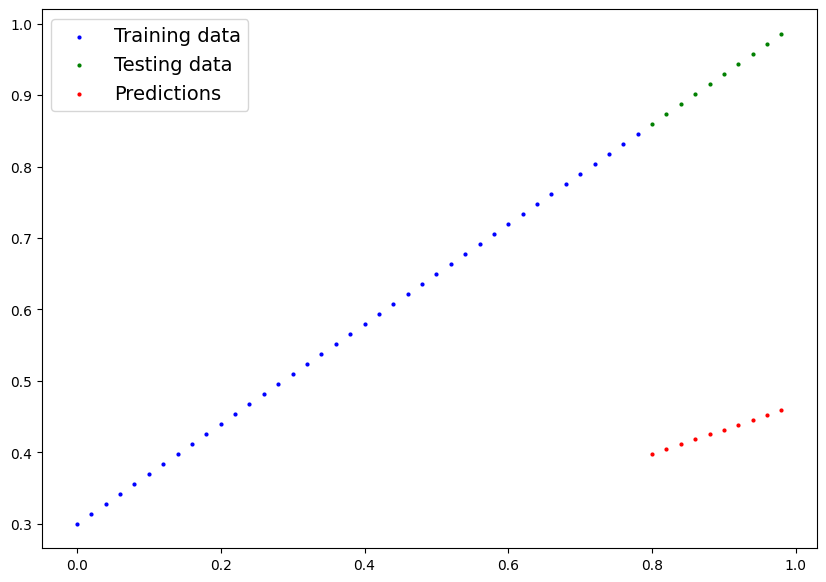

In [16]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move to move from some *unknow* parameters (these may be random) to some *know* parameters.

<dr>

Or in other words from a poor representation of the data to a better representaion of the data.

<dr>

one way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (eg. weights and bias) in our case to improve the loss function.

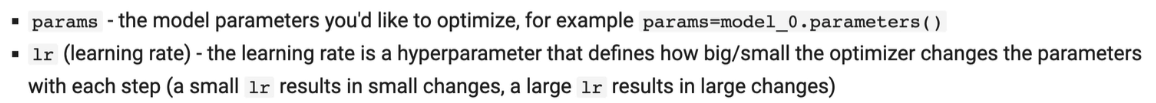

Ans specifically for pytorch, we need:

* A training loop
* A testing loop


In [17]:
# Check out our model's parameters (a parameter is a value that the model is value that the model sats itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [18]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup a optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)#lr = learning rate = possibly the most important hyperparameter

In [19]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [20]:
# optimizer.zero_grad()
# list(model_0.parameters())


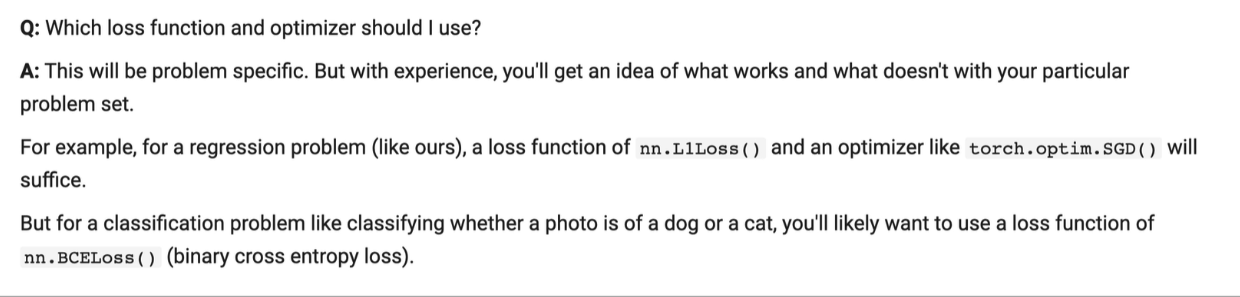

In [21]:
model_0.state_dict()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

## Building a training loop (and a testing loop) in pytorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (tis involves data moving through our model's 'forward()' functions) - to make predictions on data 
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss

In [22]:
torch.manual_seed(42)
# An epoch is one loop the data (tis is a hyperameters because we are setting it ourself)
epochs = 100


##Training

# setp 0
for epoch in range(epochs):
    # set the the model into training mode
    model_0.train() # train mode in pytorch sets all parameters that requires gradients to require gradients

    #setp 1 Forward pass
    y_pred = model_0(X_train)

    #step 2 Calculate the Loss function
    loss = loss_fn(y_pred,Y_train)

    #setp 3 optimizer

    optimizer.zero_grad()

    # Step 4

    loss.backward()

    #step 5 
    optimizer.step() #by default how the optimizer changes will acculumate through the loop so , we have to zero them above in step 3 for the next iteration of the loop
    

    model_0.eval()# tuns off gradients tracking




In [23]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

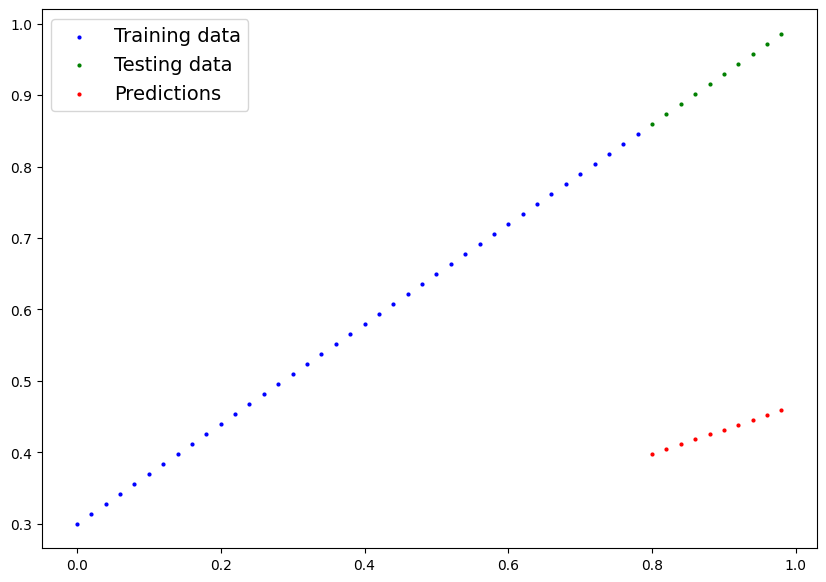

In [24]:
plot_predictions(predictions=y_preds)

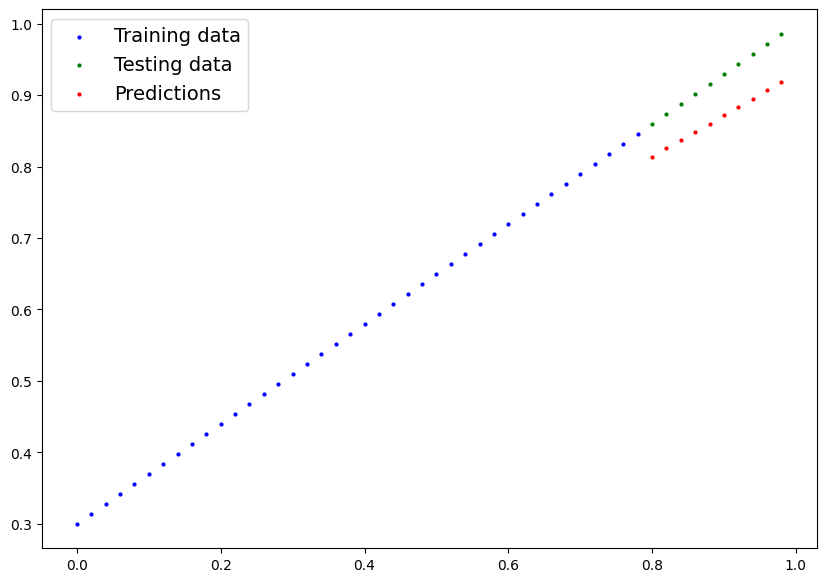

In [25]:
plot_predictions(predictions=y_preds_new)

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])),
             ('bias', tensor([0.3513], dtype=torch.float64))])

# Testing


In [27]:
torch.manual_seed(42)
# An epoch is one loop the data (tis is a hyperparameters because we are setting it ourself)
epochs = 200

##Tracking the values
epoch_count=[]
loss_values=[]
test_loss_values = []

##Training

# step 0
for epoch in range(epochs):
    # set the the model into training mode
    model_0.train() # train mode in pytorch sets all parameters that requires gradients to require gradients

    #step 1 Forward pass
    y_pred = model_0(X_train)

    #step 2 Calculate the Loss function
    loss = loss_fn(y_pred,Y_train)

    #step 3 optimizer

    optimizer.zero_grad()

    # Step 4

    loss.backward()

    #step 5 
    optimizer.step() #by default how the optimizer changes will acculumate through the loop so , we have to zero them above in step 3 for the next iteration of the loop
    
    ##Testing 

    model_0.eval()# tuns off gradients tracking

    with torch.inference_mode():
        ## 1. do the forward pass
        test_pred = model_0(X_test)

        ## 2. Claculate the loss
        test_loss=loss_fn(test_pred,Y_test)

        
    if epoch % 10 ==0:
        epoch_count.append(epoch)
        test_loss_values.append(test_loss)
        loss_values.append(loss)
        print(f"Epoch: {epoch} |Test: {loss}|Test loss:{test_loss}")






Epoch: 0 |Test: 0.024458912034492648|Test loss:0.056463512372489165
Epoch: 10 |Test: 0.021020179208354882|Test loss:0.048191052984709826
Epoch: 20 |Test: 0.01758540265836911|Test loss:0.040605486940856125
Epoch: 30 |Test: 0.014155357881994759|Test loss:0.0323330275530769
Epoch: 40 |Test: 0.010716548774564513|Test loss:0.02406058902692334
Epoch: 50 |Test: 0.007283442308727353|Test loss:0.016475022983069642
Epoch: 60 |Test: 0.0038517246542366657|Test loss:0.008202572535987019
Epoch: 70 |Test: 0.008931417997662885|Test loss:0.0050241684431983295
Epoch: 80 |Test: 0.008931417997662885|Test loss:0.0050241684431983295
Epoch: 90 |Test: 0.008931417997662885|Test loss:0.0050241684431983295
Epoch: 100 |Test: 0.008931417997662885|Test loss:0.0050241684431983295
Epoch: 110 |Test: 0.008931417997662885|Test loss:0.0050241684431983295
Epoch: 120 |Test: 0.008931417997662885|Test loss:0.0050241684431983295
Epoch: 130 |Test: 0.008931417997662885|Test loss:0.0050241684431983295
Epoch: 140 |Test: 0.0089314

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])

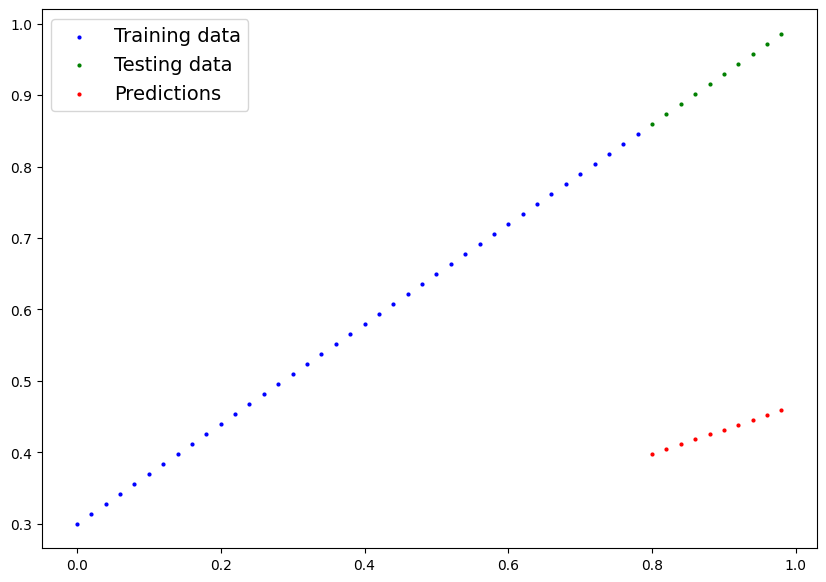

In [29]:
plot_predictions(predictions=y_preds)

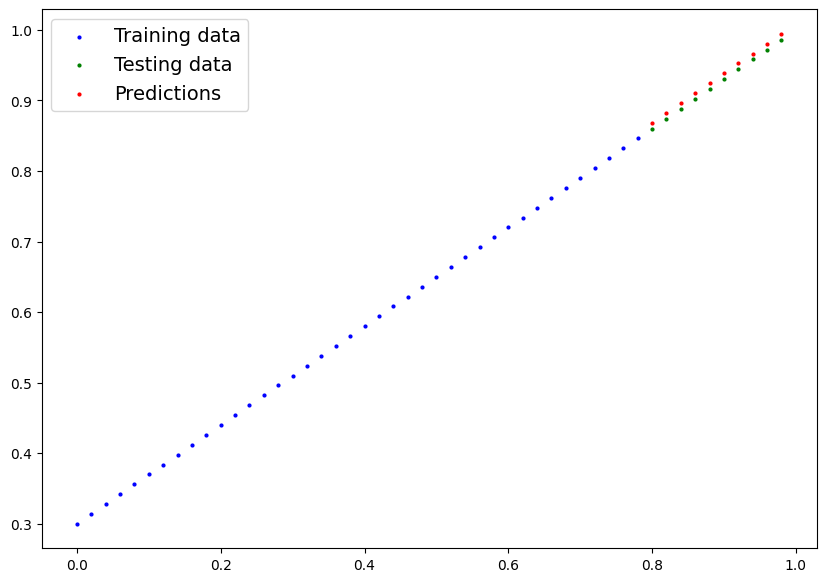

In [30]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

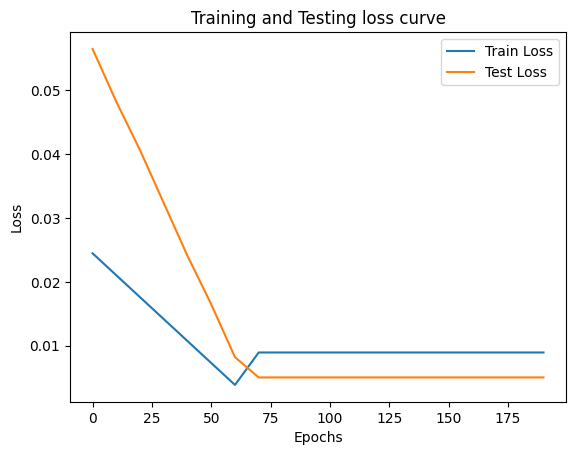

In [31]:
#plot the loss curves
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and Testing loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

# Saving a Model

There are 3  main methods that should about for saving and loading models in PyTorch.

1. 'troch.save()' - allows you save a PyTorch object in python pickle format
2. "torch.load()" - allows you load a saved model
3. "torch.nn.Module.load_state_dict()" - this allows to load a model's saves state dictionary

In [32]:
# saving our pytorch model
from pathlib import Path

# 1. create directory
MODEL_PATH=Path("Models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME= "01_Pytorch_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



Saving model to: Models\01_Pytorch_Model.pth


In [33]:
#Loading the saved model
loaded_module_0 = LinearRegressionModel()
loaded_module_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [34]:
#Load the saved state_dict of module_0 (this will update the new instance with updated parameters)
loaded_module_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [35]:
loaded_module_0.state_dict()

OrderedDict([('weights', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [36]:
# Making the prediction 
loaded_module_0.eval()
with torch.inference_mode():
    loaded_preds=loaded_module_0(X_test)

    loaded_loss = loss_fn(loaded_preds,Y_test)
    

In [37]:
y_preds_new==loaded_preds 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Putting all together

In [38]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.3.1'

In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cuda


In [40]:
##Date
weight = 0.7
bias = 0.3

#create range

start = 0
end = 1
step = 0.02

#Create X and Y (features and labels)
X2 = torch.arange(start,end,step).unsqueeze(dim=1)
Y2 = weight * X2 + bias

X2[:10],Y2[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [49]:
#spliting data
train_split2 = int(0.8*len(X2))
X_train2,Y_train2 = X2[:train_split2],Y2[:train_split2]
X_test2,Y_test2 = X2[train_split2:],Y2[train_split2:]

len(X_train2),len(X_test2)


(40, 10)

In [50]:
#plot the data
def plot_predictions(train_data=X_train2,
                     train_labels=Y_train2,
                     test_data=X_test2,
                     test_labels= Y_test2,
                     predictions=None):
    
    """
    ploats training data , test data and compares predictions.
    """
    
    plt.figure(figsize=(10,7))
    
    #Plot training data in blue
    
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    
    #Plot test data in green
    
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
    
    #Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

    # show the legend
    plt.legend(prop={"size": 14})     

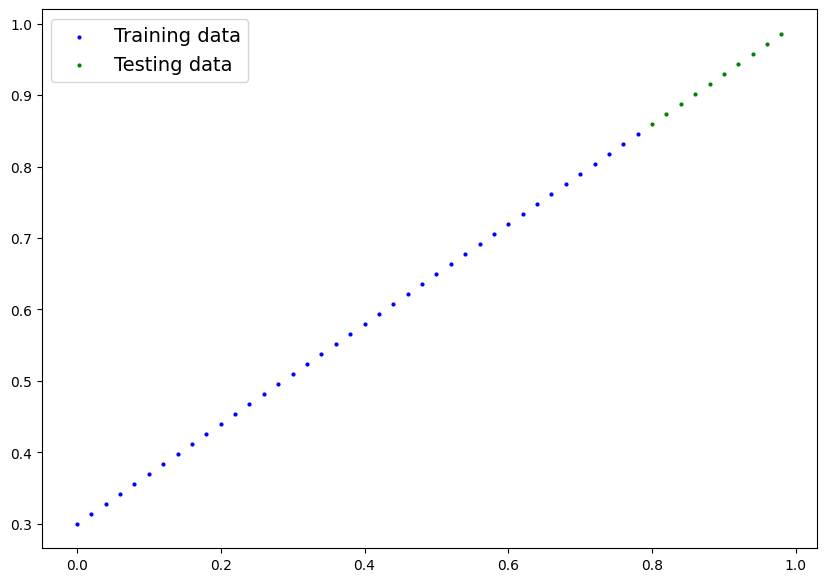

In [51]:
plot_predictions(X_train2,Y_train2,X_test2,Y_test2)

Building the model


In [52]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        #Use nn.Linera() for creating the model parameters 
        self.linear_layer = nn.Linear(in_features=1,
                                       out_features=1)
        
    def forward(self,X2:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(X2)      
        

In [53]:
torch.manual_seed(42)
model_1=LinearRegressionModelV2()

In [54]:
list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [55]:
#set the model to gpu
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop


In [56]:
##Training the Model

#Loss
loss_fn2 = nn.L1Loss() #MAE

#Optimizer

optimizer2 = torch.optim.SGD(params=model_1.parameters(),
                             lr=0.01)


In [57]:
#Training loop

torch.manual_seed(42)

# Put data on the target device 
X_train2 = X_train2.to(device)
Y_train2 = Y_train2.to(device)
X_test2 = X_test2.to(device)
Y_test2 = Y_test2.to(device)
epochs2 = 200

for epoch in range(epochs2):
    model_1.train()

    y_pred2 = model_1(X_train2)

    loss2 = loss_fn2(y_pred2,Y_train2)

    optimizer2.zero_grad()

    loss2.backward()

    optimizer2.step()

    ## Testing loop

    model_1.eval()

    with torch.inference_mode():
        test_pred2 = model_1(X_test2)

        test_loss2 = loss_fn2(test_pred2,Y_test2)


    # Print out what's happening
    if epoch % 10 == 0 :
        print(f"Epoch: {epoch} | Loss: {loss2} | Test_Loss: {test_loss2}")




Epoch: 0 | Loss: 0.5551779866218567 | Test_Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test_Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test_Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test_Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test_Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test_Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test_Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test_Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test_Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test_Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test_Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test_Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test_Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test_Loss: 0.013801801018416

In [58]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [59]:
##Saving the model

from pathlib import Path

MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


MODEL_NAME = "model_1.pth"

MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

torch.save(model_1.state_dict(),MODEL_SAVE_PATH)

In [66]:
 ## Loading the model
loaded_model_1= LinearRegressionModelV2()

#load the saved model
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [67]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])